# Principal Components Analysis

<img src="./sharif.png" alt="SUT logo" width=300 height=300 align=left class="saturate">

<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Spring 2024<br>
<font color=3C99D size=5>
    Practical Assignment 5<br>
<font color=696880 size=4>
    Amirhossein Alamdar

____

In [1]:
student_number = "402211767"
full_name = "shayan aryania"
assert student_number and full_name is not None, 'pls input your information'

# Introduction 

In this assignment, you will implement PCA and try to interpret it.

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset Preparation (30)

Read the nutrition CSV file and display a few samples.

In [4]:
#TODO
data = pd.read_csv('./nutrition.csv')
data.head()

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


Display dataset information.

In [5]:
#TODO
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8618 non-null   int64  
 1   FoodGroup         8618 non-null   object 
 2   ShortDescrip      8618 non-null   object 
 3   Descrip           8618 non-null   object 
 4   CommonName        1063 non-null   object 
 5   MfgName           1560 non-null   object 
 6   ScientificName    732 non-null    object 
 7   Energy_kcal       8618 non-null   float64
 8   Protein_g         8618 non-null   float64
 9   Fat_g             8618 non-null   float64
 10  Carb_g            8618 non-null   float64
 11  Sugar_g           8618 non-null   float64
 12  Fiber_g           8618 non-null   float64
 13  VitA_mcg          8618 non-null   float64
 14  VitB6_mg          8618 non-null   float64
 15  VitB12_mcg        8618 non-null   float64
 16  VitC_mg           8618 non-null   float64


Exclude the non-numeric features (you will need these features later in the notebook).

In [6]:
#TODO
numeric_data = data.select_dtypes(include='number')
numeric_data.drop('ID', axis=1, inplace=True)

In [7]:
numeric_data.head()

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


First of all, plot the correlation matrix and identify redundant features. Note to use numerical features for this.

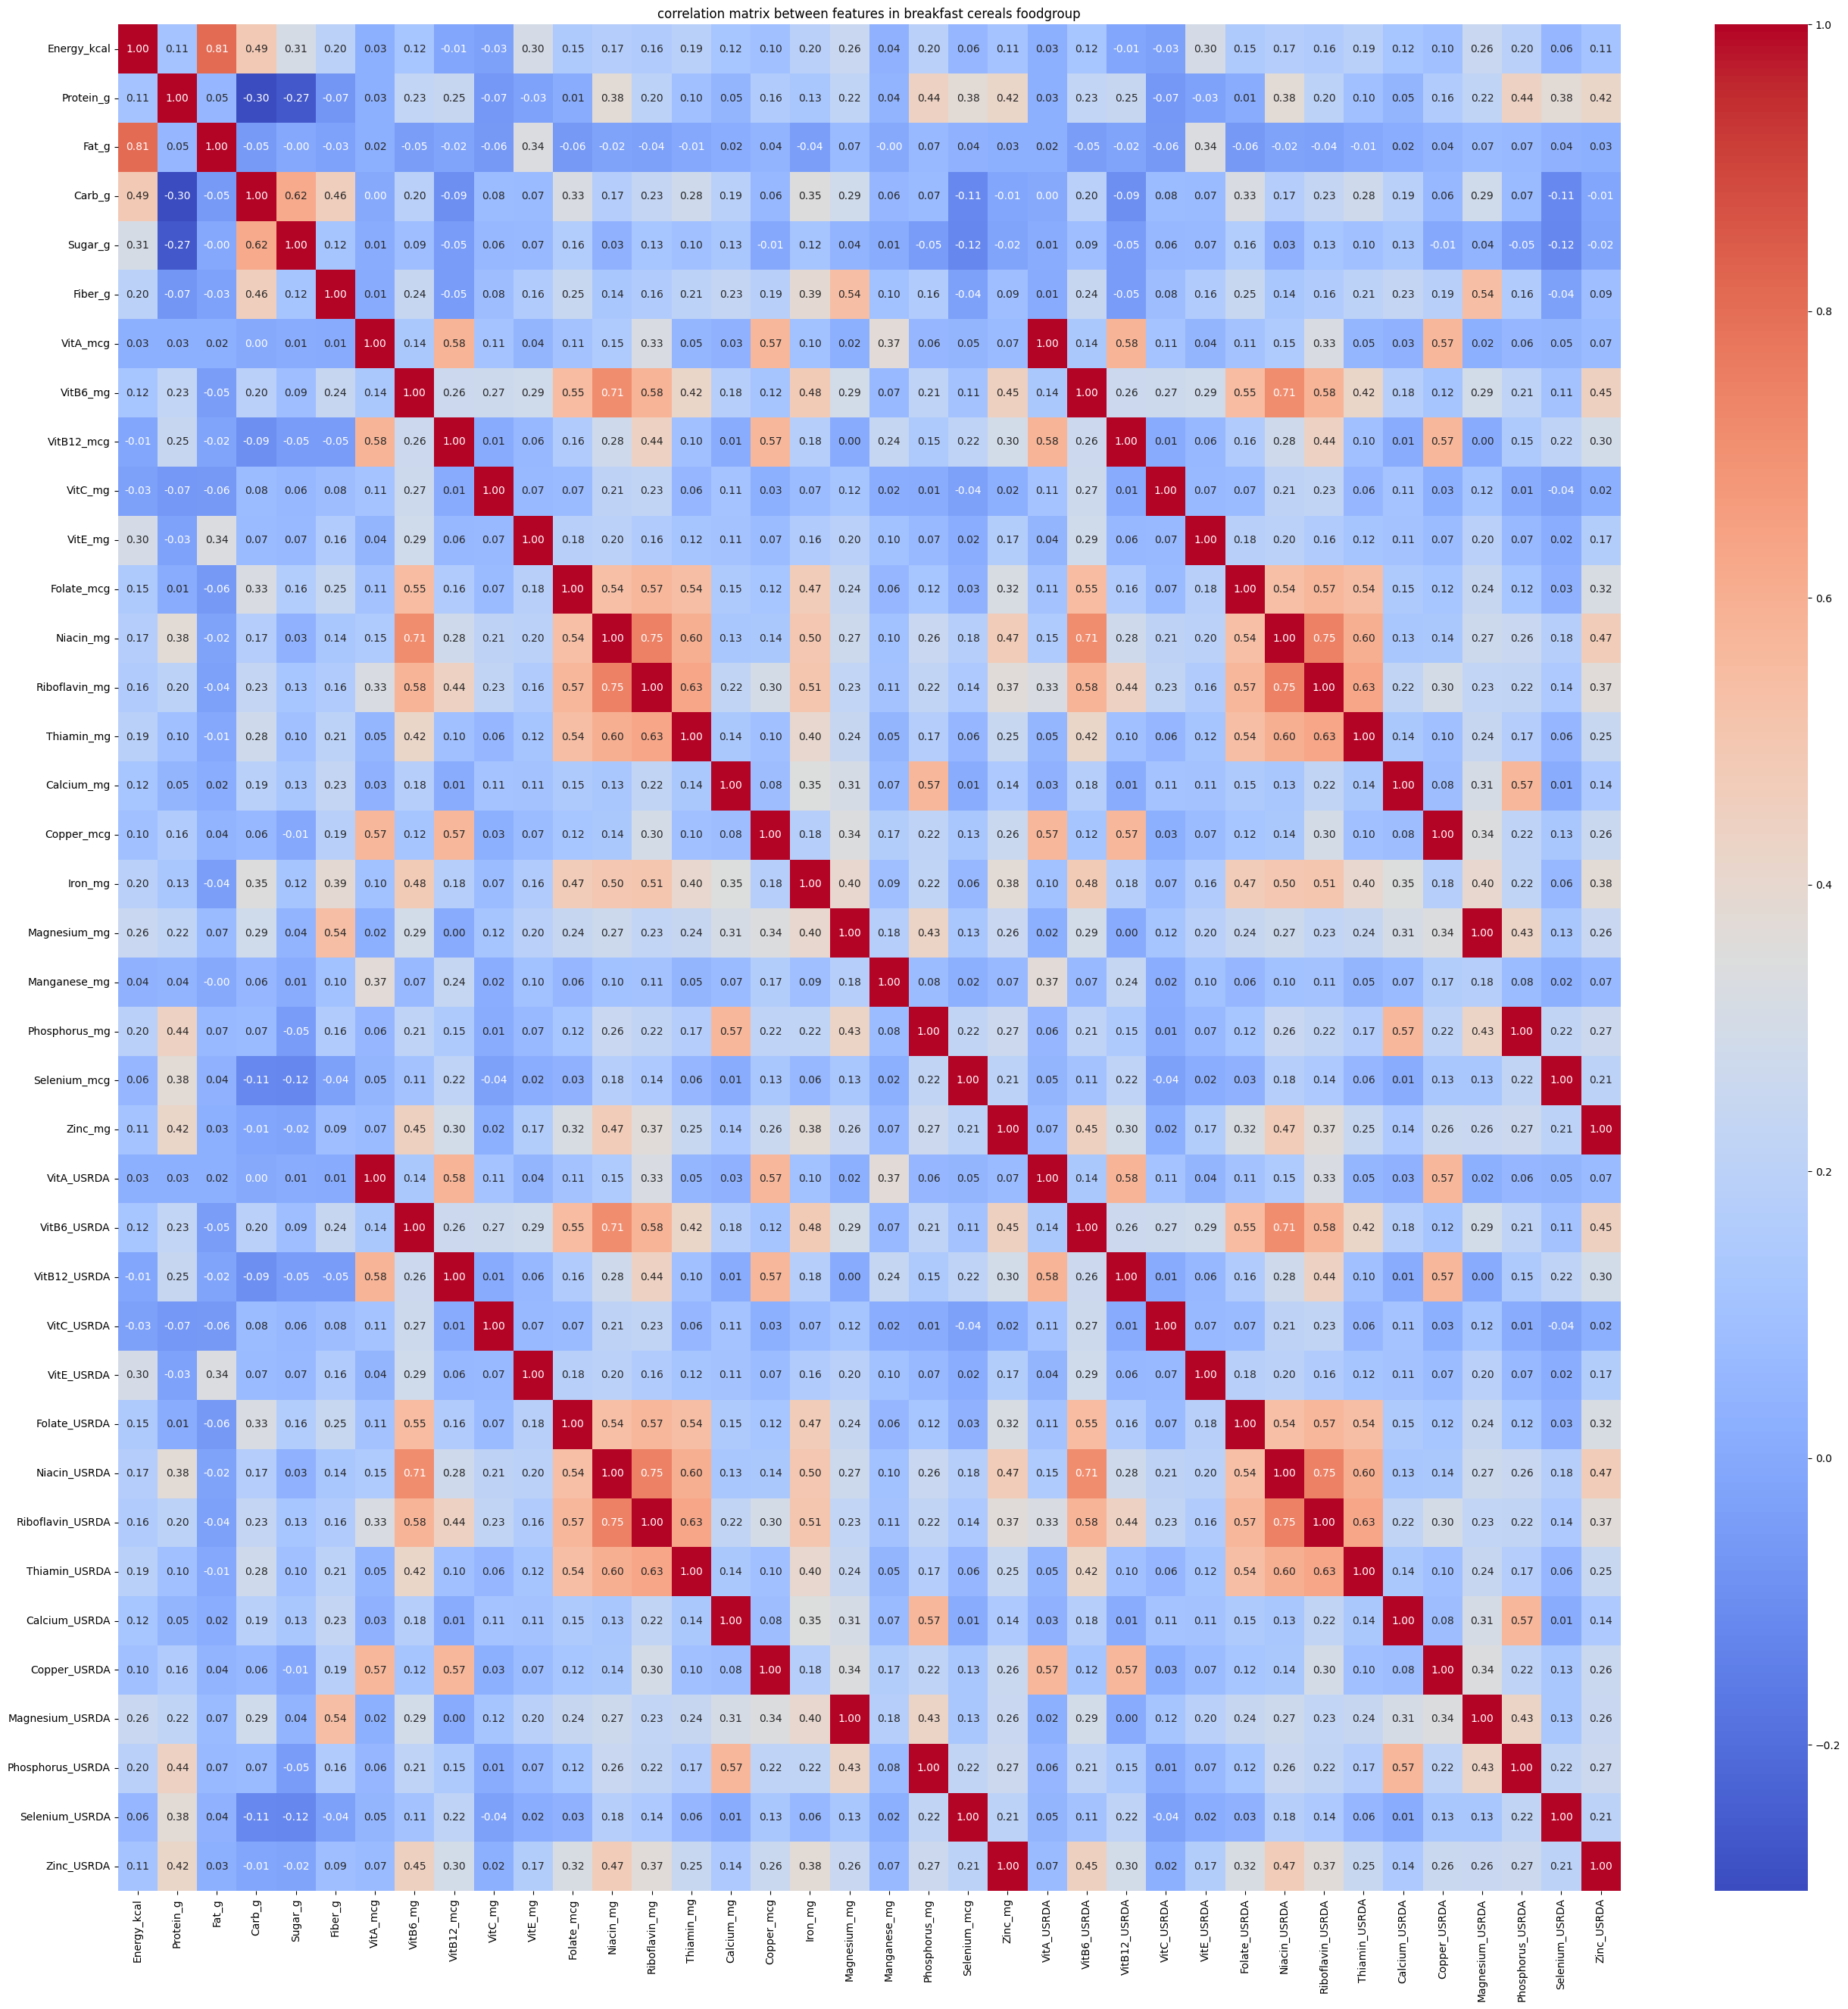

In [8]:
#TODO
corr_matrix = numeric_data.corr()

plt.figure(figsize=(32,32))
sns.heatmap(corr_matrix,annot=True, cmap='coolwarm', fmt=".2f")
plt.title("correlation matrix between features in breakfast cereals foodgroup")
plt.show()

Identify redundant features and remove them from the dataframe. Plot the correlation matrix again.

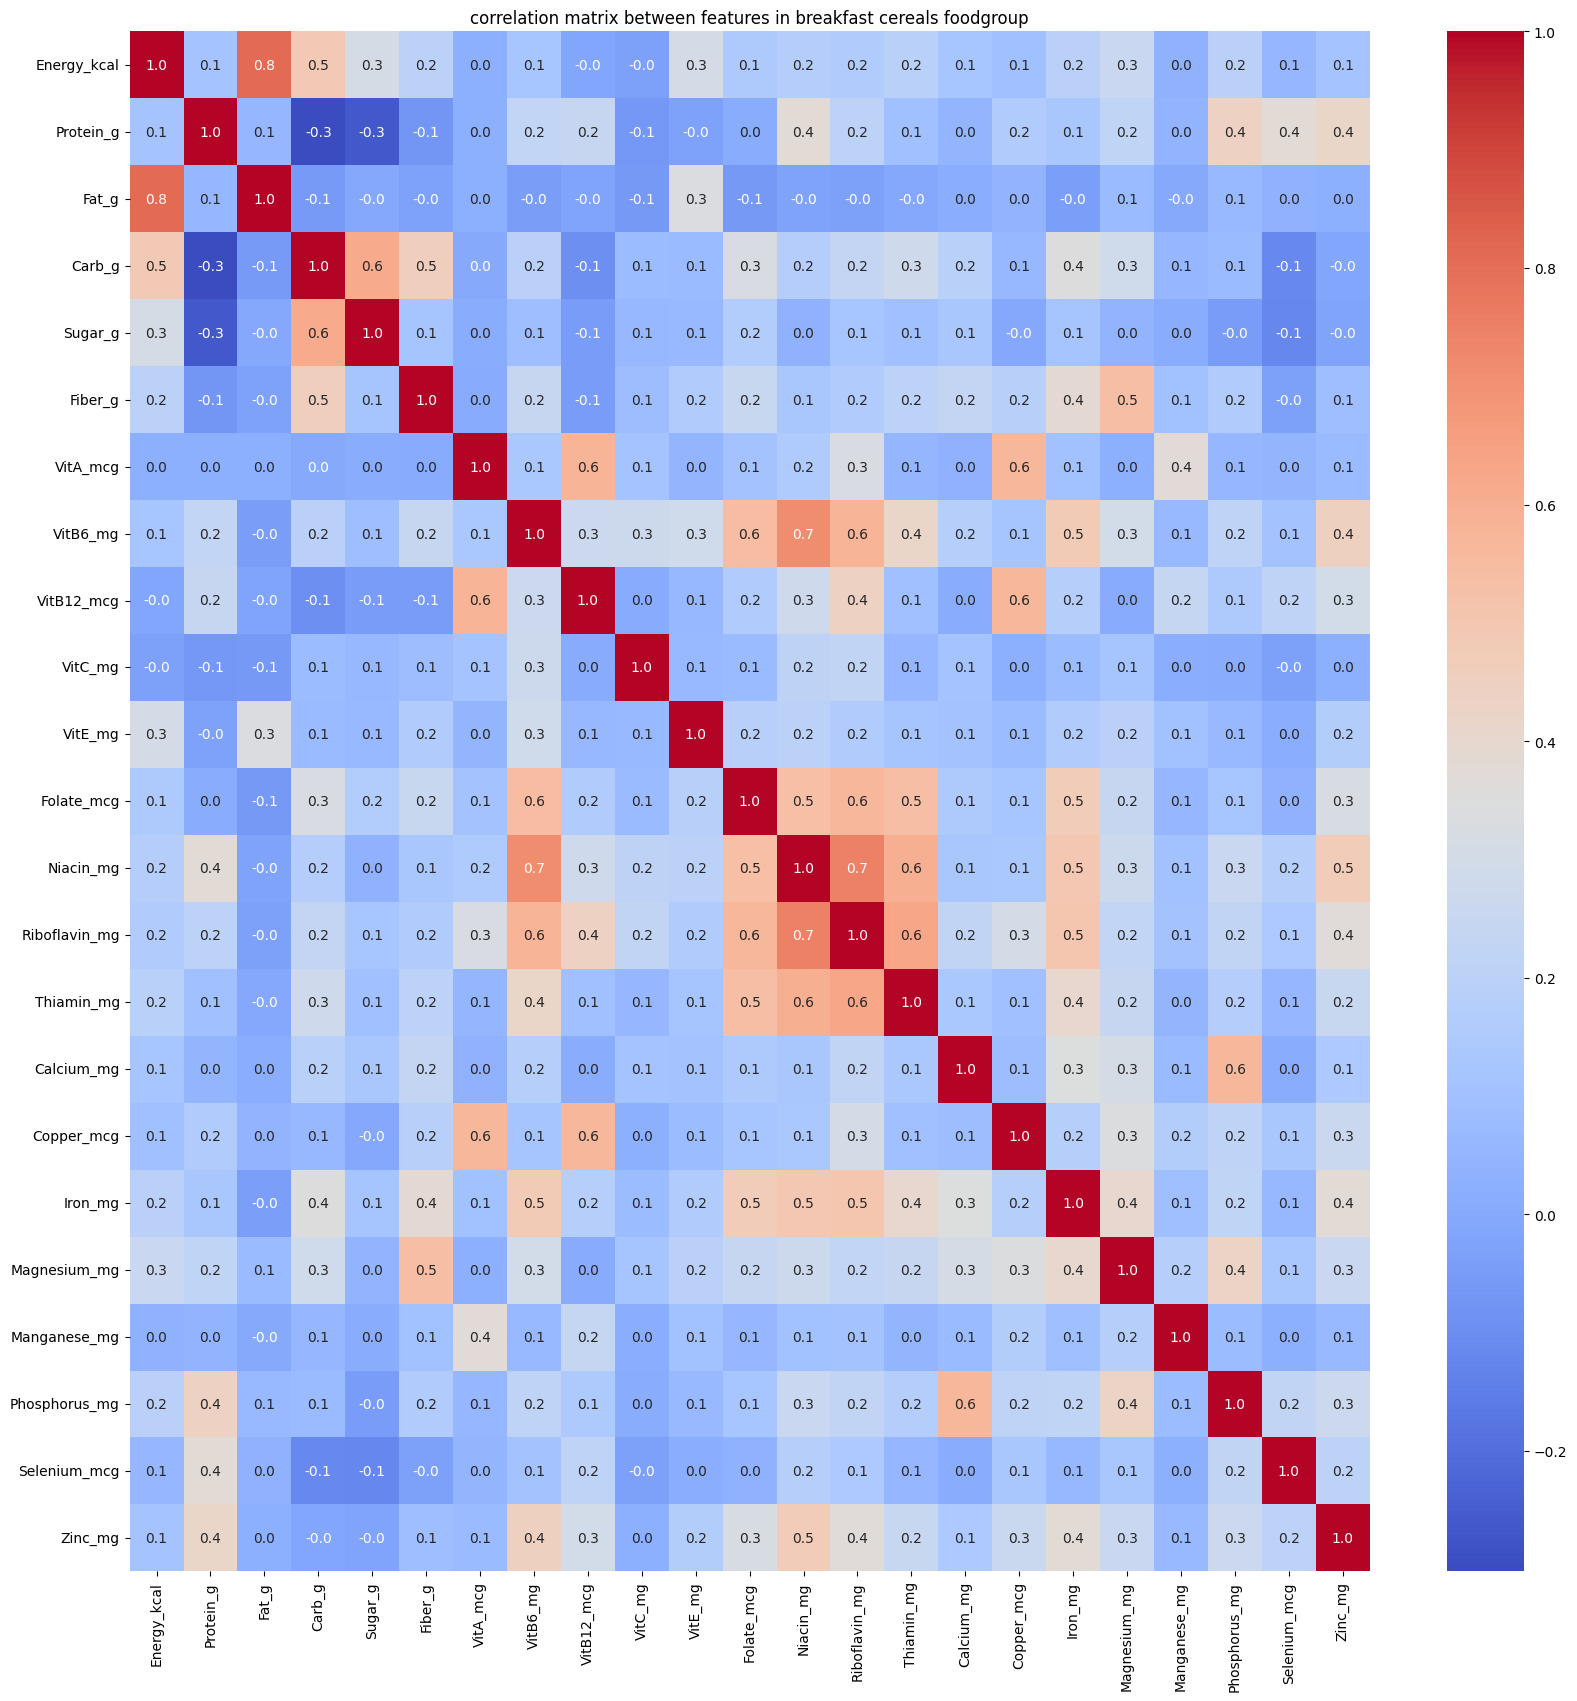

In [9]:
#TODO
highly_corr_cols = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.95:
            colname = corr_matrix.columns[i]
            highly_corr_cols.add(colname)

clean_numeric_data = numeric_data.drop(columns=highly_corr_cols)

new_corr_matrix = clean_numeric_data.corr()

plt.figure(figsize=(20,20))
sns.heatmap(new_corr_matrix,annot=True, cmap='coolwarm', fmt=".1f")
plt.title("correlation matrix between features in breakfast cereals foodgroup")
plt.show()

Explore the dataset by plotting the distribution of each feature separately.

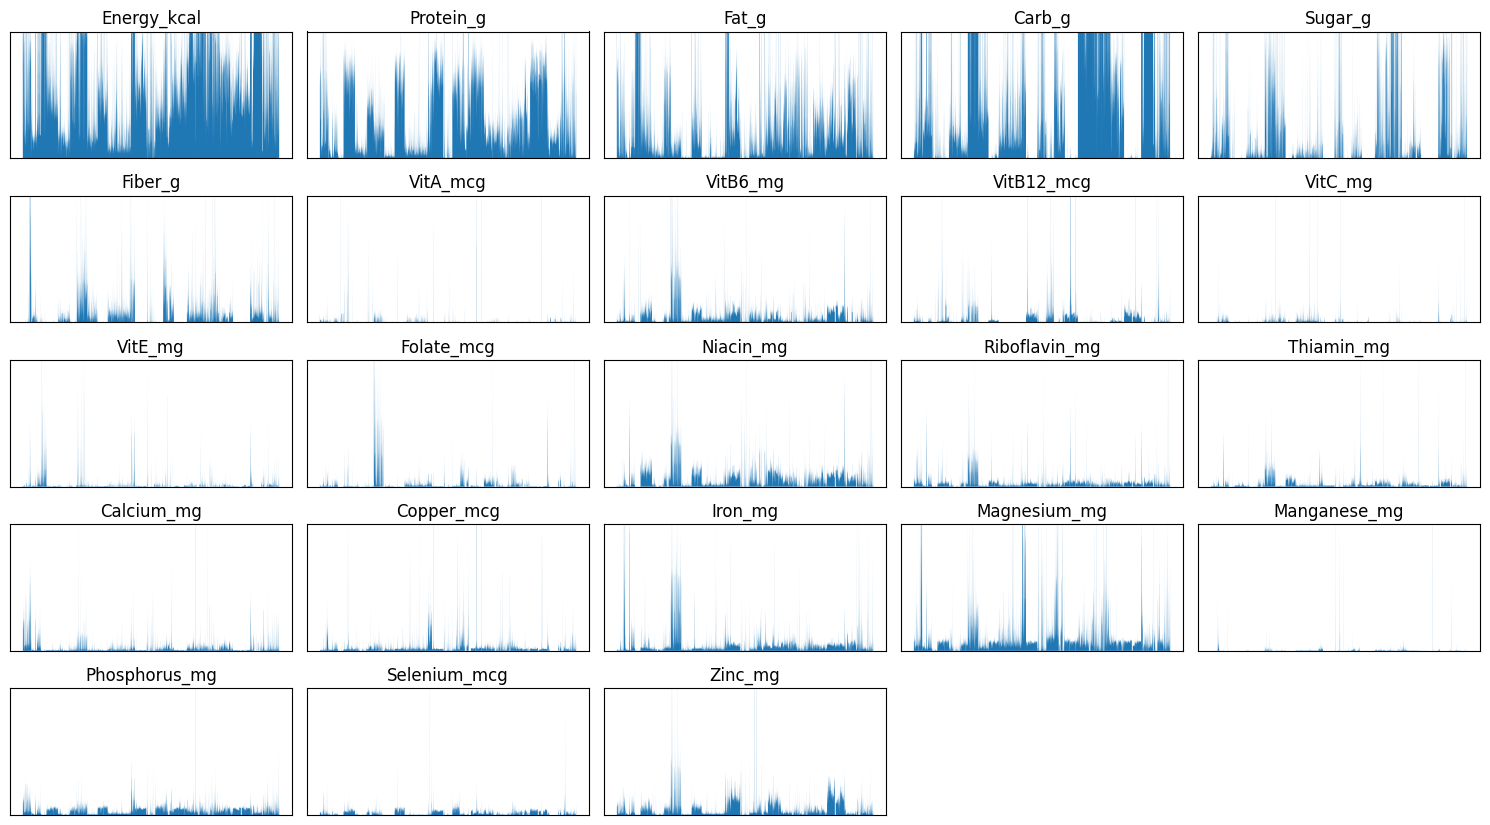

In [10]:
#TODO
plt.figure(figsize=(15,10))
for i, column in enumerate(clean_numeric_data):
    plt.subplot(6, 5, i+1)
    plt.stackplot(range(len(clean_numeric_data)), clean_numeric_data[column])
    plt.title(column)
    plt.ylim([0, clean_numeric_data[column].max() * 0.4])
    plt.grid(True)
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

We can use the Box-Cox transformation to make the data more normally distributed. You can look it up for more information

In [11]:
from scipy.stats import boxcox
# Assuming df is our pandas DataFrame containing numerical features
# df_boxcoxed will be a numpy array
df = clean_numeric_data
df = df + 1
df_boxcoxed = pd.DataFrame(index=df.index)

for i in df.columns.values:
    df_boxcoxed["%s_boxcoxed" % i] = boxcox(df.loc[:, i])[0]


Now plot the feature distributions again and compare it with the previous plots. (No need to write down anything)

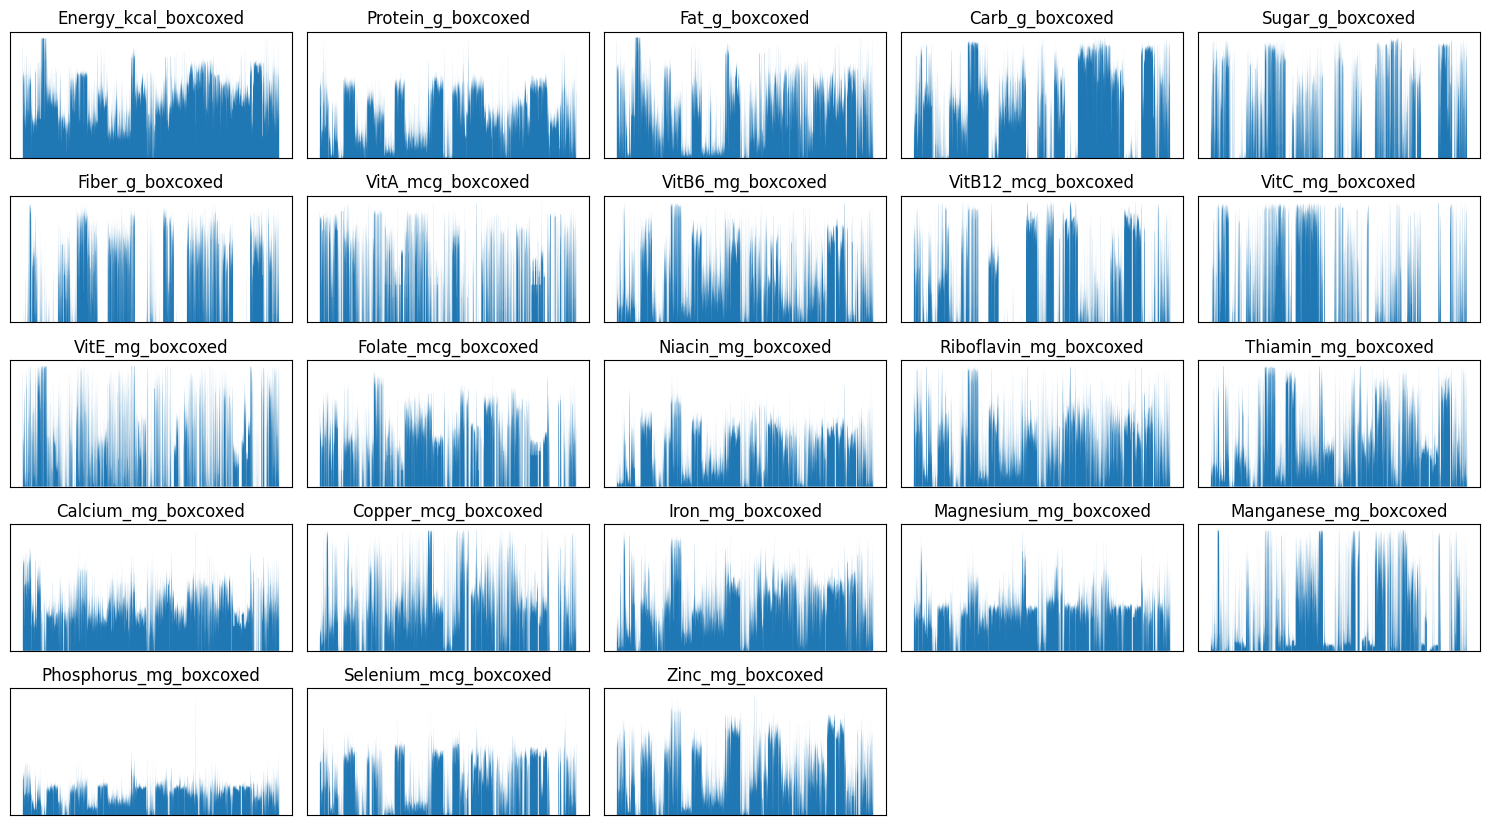

In [12]:
#TODO
plt.figure(figsize=(15,10))

for i, column in enumerate(df_boxcoxed):
    plt.subplot(6, 5, i+1)
    plt.stackplot(range(len(df_boxcoxed)), df_boxcoxed[column])
    plt.title(column)
    plt.grid(True)
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

Finally, Standardize the data to mean 0 and variance 1. You can use standard scaler.

In [13]:
#TODO
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df_boxcoxed)
df_standardized = pd.DataFrame(df_standardized, columns=df_boxcoxed.columns)
total_mean = df_standardized.values.mean()
total_std = df_standardized.values.std()

In [14]:
print("Total Mean:", total_mean)
print("Total Standard Deviation:", total_std)

Total Mean: 2.925135824816823e-17
Total Standard Deviation: 0.9999999999999999


# Model Implementation (40)

Implement PCA from scratch. Remember to calculate and save components and explained variance ratio for later sections.

In [15]:
class CustomPCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None
        self.explained_variance_ratio_ = None

    def fit(self, X):
        #TODO
        self.mean = np.mean(X, axis=0)
        X_centered = X - self.mean
        cov_matrix = np.cov(X_centered, rowvar=False)
        eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
        sorted_idx = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[sorted_idx]
        eigenvectors = eigenvectors[:, sorted_idx]

        self.components = eigenvectors[:, :self.n_components]

        total_variance = np.sum(eigenvalues)
        self.explained_variance_ratio_ = eigenvalues[:self.n_components] / total_variance

    def transform(self, X):
        #TODO
        # return the pca result
        X_centered = X - self.mean
        return np.dot(X_centered, self.components)

    def get_explained_variance_ratio(self):
        #TODO
        #return explained variance of shape (n_components, )
        return self.explained_variance_ratio_
    
    def get_components(self):
        #TODO
        #return pca components (eigenvectors)
        return self.components


Fit the model and obtain the PCA results. The number of components should be the same as the number of features.

In [16]:
#TODO
pca = CustomPCA(n_components=2)
pca.fit(df_standardized)
transformed_data = pca.transform(df_standardized)

#### check the eigenvalues to find most important components
Plot the explained variance ratio based on the number of components.


In [17]:
#TODO
explained_variance_ratio = pca.get_explained_variance_ratio()
components = pca.get_components()

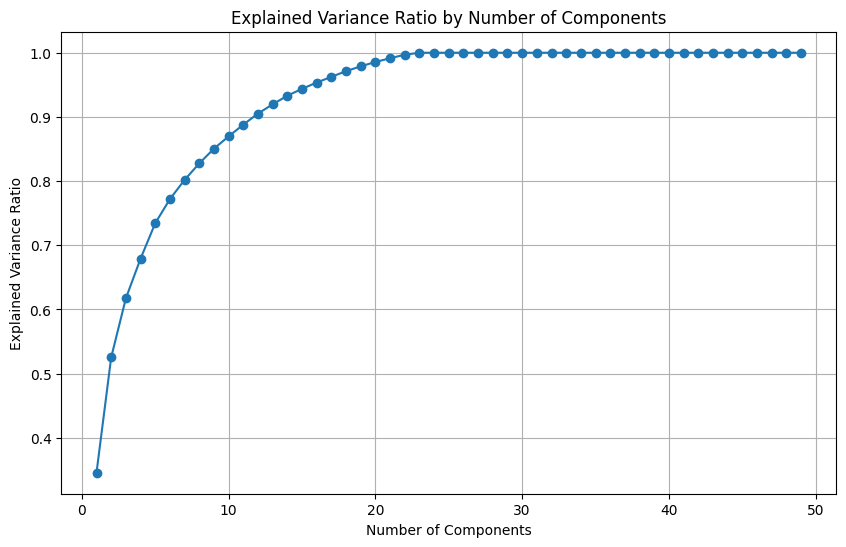

In [18]:
explained_variance_ratios = []
num_components = range(1, 50)

for n in num_components:
    pca = CustomPCA(n_components=n)
    pca.fit(df_standardized)
    explained_variance_ratios.append(np.sum(pca.get_explained_variance_ratio()))

# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(num_components, explained_variance_ratios, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Number of Components')
plt.grid(True)
plt.show()

therefore we are going to pick 5 components

In [19]:
#TODO
#print the total explained variance ration for the first 5 components
pca_5 = CustomPCA(n_components=5)
pca_5.fit(df_standardized)
transformed_data = pca_5.transform(df_standardized)
total_explained_variance_5 = np.sum(pca_5.get_explained_variance_ratio())
print(f"for the first 5 components: {total_explained_variance_5}")

for the first 5 components: 0.7342383065146949


Build a new DataFrame with the first 5 components as features and include the FoodGroup column from the first section.

In [20]:
#TODO
pca_columns = [f'PC{i+1}' for i in range(5)]
pca_df = pd.DataFrame(transformed_data, columns=pca_columns)
pca_df['FoodGroup'] = data['FoodGroup'].values

In [21]:
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,FoodGroup
0,2.638414,1.702512,-1.283725,-3.759546,-2.413650,Dairy and Egg Products
1,2.537931,1.550464,-1.279816,-3.634066,-2.492683,Dairy and Egg Products
2,3.751335,2.080190,-2.067932,-3.668154,-2.457203,Dairy and Egg Products
3,-2.000578,1.361858,0.395834,-2.432792,-0.887796,Dairy and Egg Products
4,-1.582713,1.321484,0.238444,-2.597599,-1.286317,Dairy and Egg Products


We expect these new features to be orthogonal to each other. Check this and show the correlation between the features.

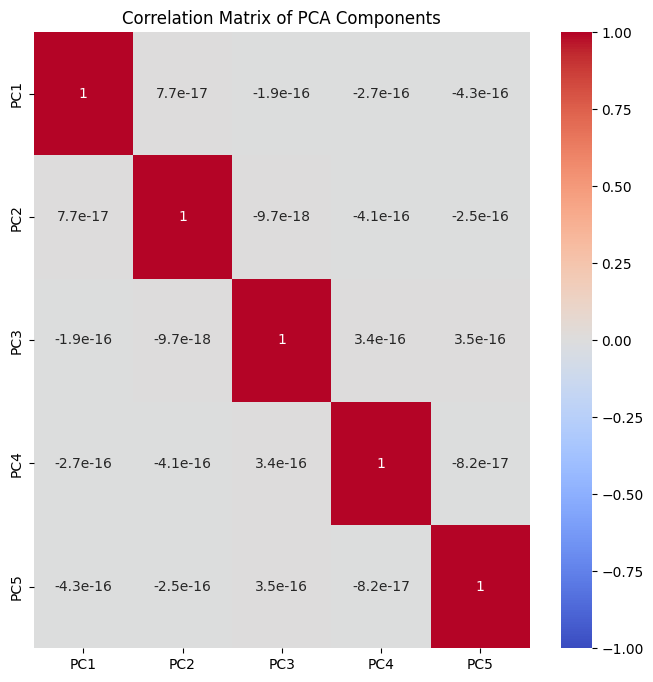

In [22]:
#TODO
correlation_matrix = pca_df[pca_columns].corr()
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of PCA Components')
plt.show()

# Result Analysis (30)

### 1- Eigenvectors (10):

In this part, you are required to plot the contribution of nutrients to our new axes or components. Essentially, plot the eigenvectors calculated in our PCA model.

In [23]:
# TODO get eigenvectors
components = pca_5.get_components()

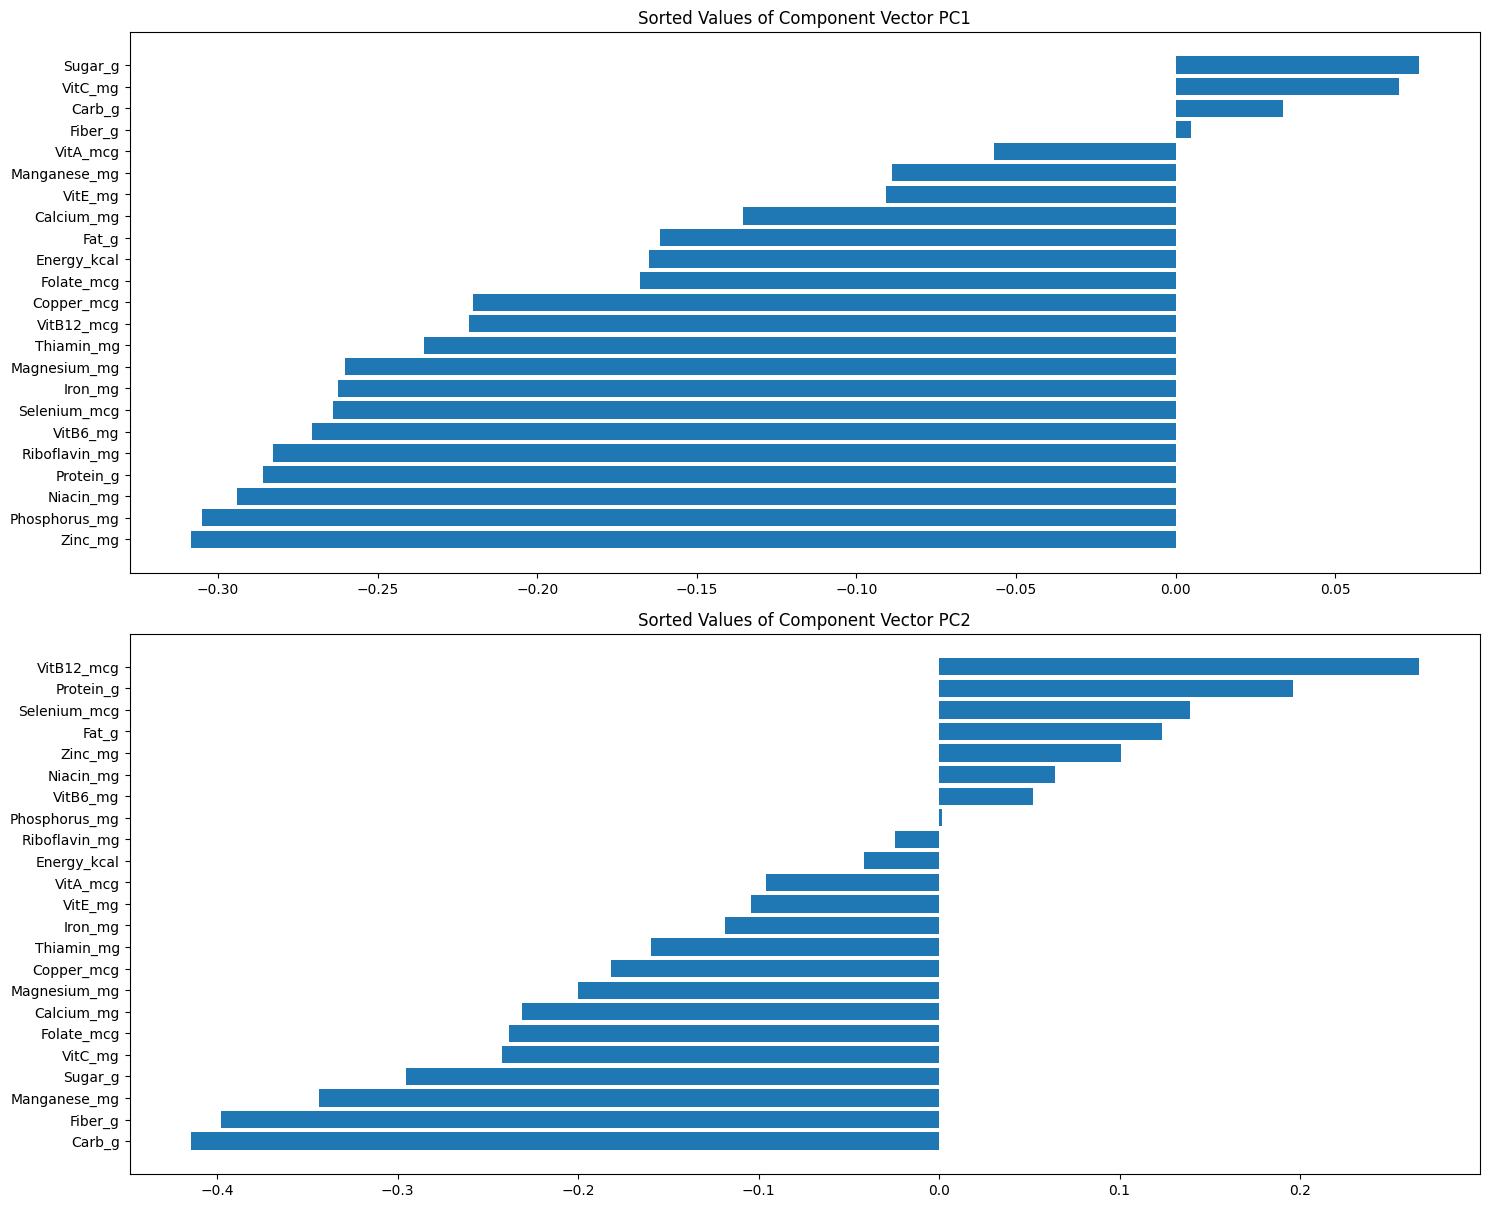

In [24]:
#TODO
numerical_features =[]
for i,column in enumerate(clean_numeric_data):
  numerical_features.append(column)

numerical_features = np.array(numerical_features)

plt.figure(figsize=(15, 30))
for i in range(2):
    sorted_indices = np.argsort(components[:, i])
    sorted_components = components[:, i][sorted_indices]
    sorted_features = numerical_features[sorted_indices]

    plt.subplot(components.shape[1], 1, i + 1)
    plt.barh(sorted_features, sorted_components)
    plt.title(f'Sorted Values of Component Vector PC{i+1}')

plt.tight_layout()
plt.show()

### What do these plots tell us about the first and second components?

<span style="color:skyblue;font-size: 20px;">YOUR ANSWER</span>

* به نظر می رسد 
PC1 
غذاها را بر اساس قندشان متمایز می کند
و محتوای کربوهیدرات در برابر محتوای آنها از مواد معدنی و پروتئین های خاص. غذاهایی با محتوای قند و کربوهیدرات بالا امتیاز PC1 بالاتری خواهند داشت، در حالی که غذاهای غنی از مواد معدنی مانند روی و فسفر و همچنین پروتئین، امتیاز PC1 کمتری خواهند داشت.

* PC2 
غذاها را بر اساس محتوای ویتامین B12،
پروتئین و چربی آن ها از محتوای کربوهیدرات، فیبر و منگنز متمایز می کند. غذاهایی با ویتامین B12، پروتئین و چربی بالاتر، امتیاز PC2 بالاتری دارند، در حالی که غذاهایی که دارای کربوهیدرات، فیبر و منگنز بالاتری هستند، امتیاز PC2 کمتری خواهند داشت.

این بینش‌ها می‌تواند به درک متمایزکننده‌های تغذیه‌ای اولیه در مجموعه داده کمک کند. به عنوان مثال، PC1 ممکن است غذاهای قندی و نشاسته ای را از غذاهای غنی از مواد معدنی و پروتئین جدا کند، در حالی که PC2 ممکن است غذاهای پرپروتئین و پرچرب را از غذاهای فیبردار و پر کربوهیدرات جدا کند.



### 2- Distributions (10)

We're now curious about the relationship between PCAs and the food groups. To better understand this, select the top 500 samples with the highest PCA1 values and plot their food group distribution. Essentially, we're seeking to identify which food groups are more likely to be associated with high PCA1 values. No need for normalization; simply plotting the counts will suffice.

Afterward, plot the distribution of PCA1 for each food group. We're interested in understanding the PCA1 values for each food group.

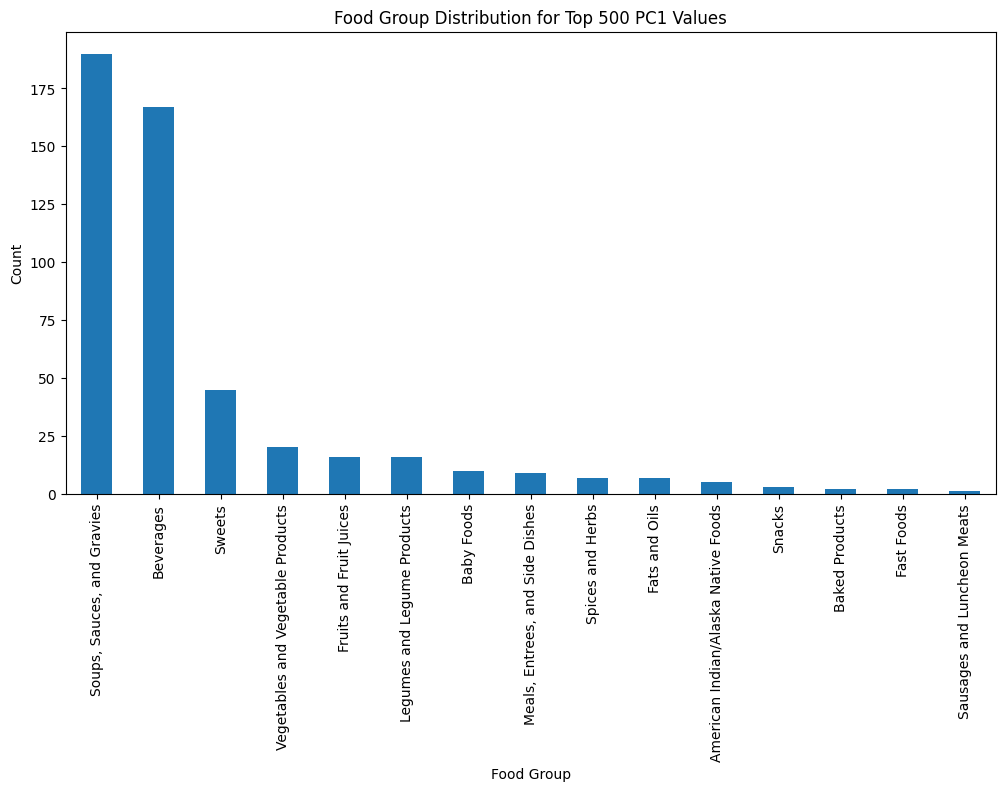

In [25]:
#TODO
top_500_pc1 = pca_df.nlargest(500, 'PC1')
plt.figure(figsize=(12, 6))
top_500_pc1['FoodGroup'].value_counts().plot(kind='bar')
plt.xlabel('Food Group')
plt.ylabel('Count')
plt.title('Food Group Distribution for Top 500 PC1 Values')
plt.show()

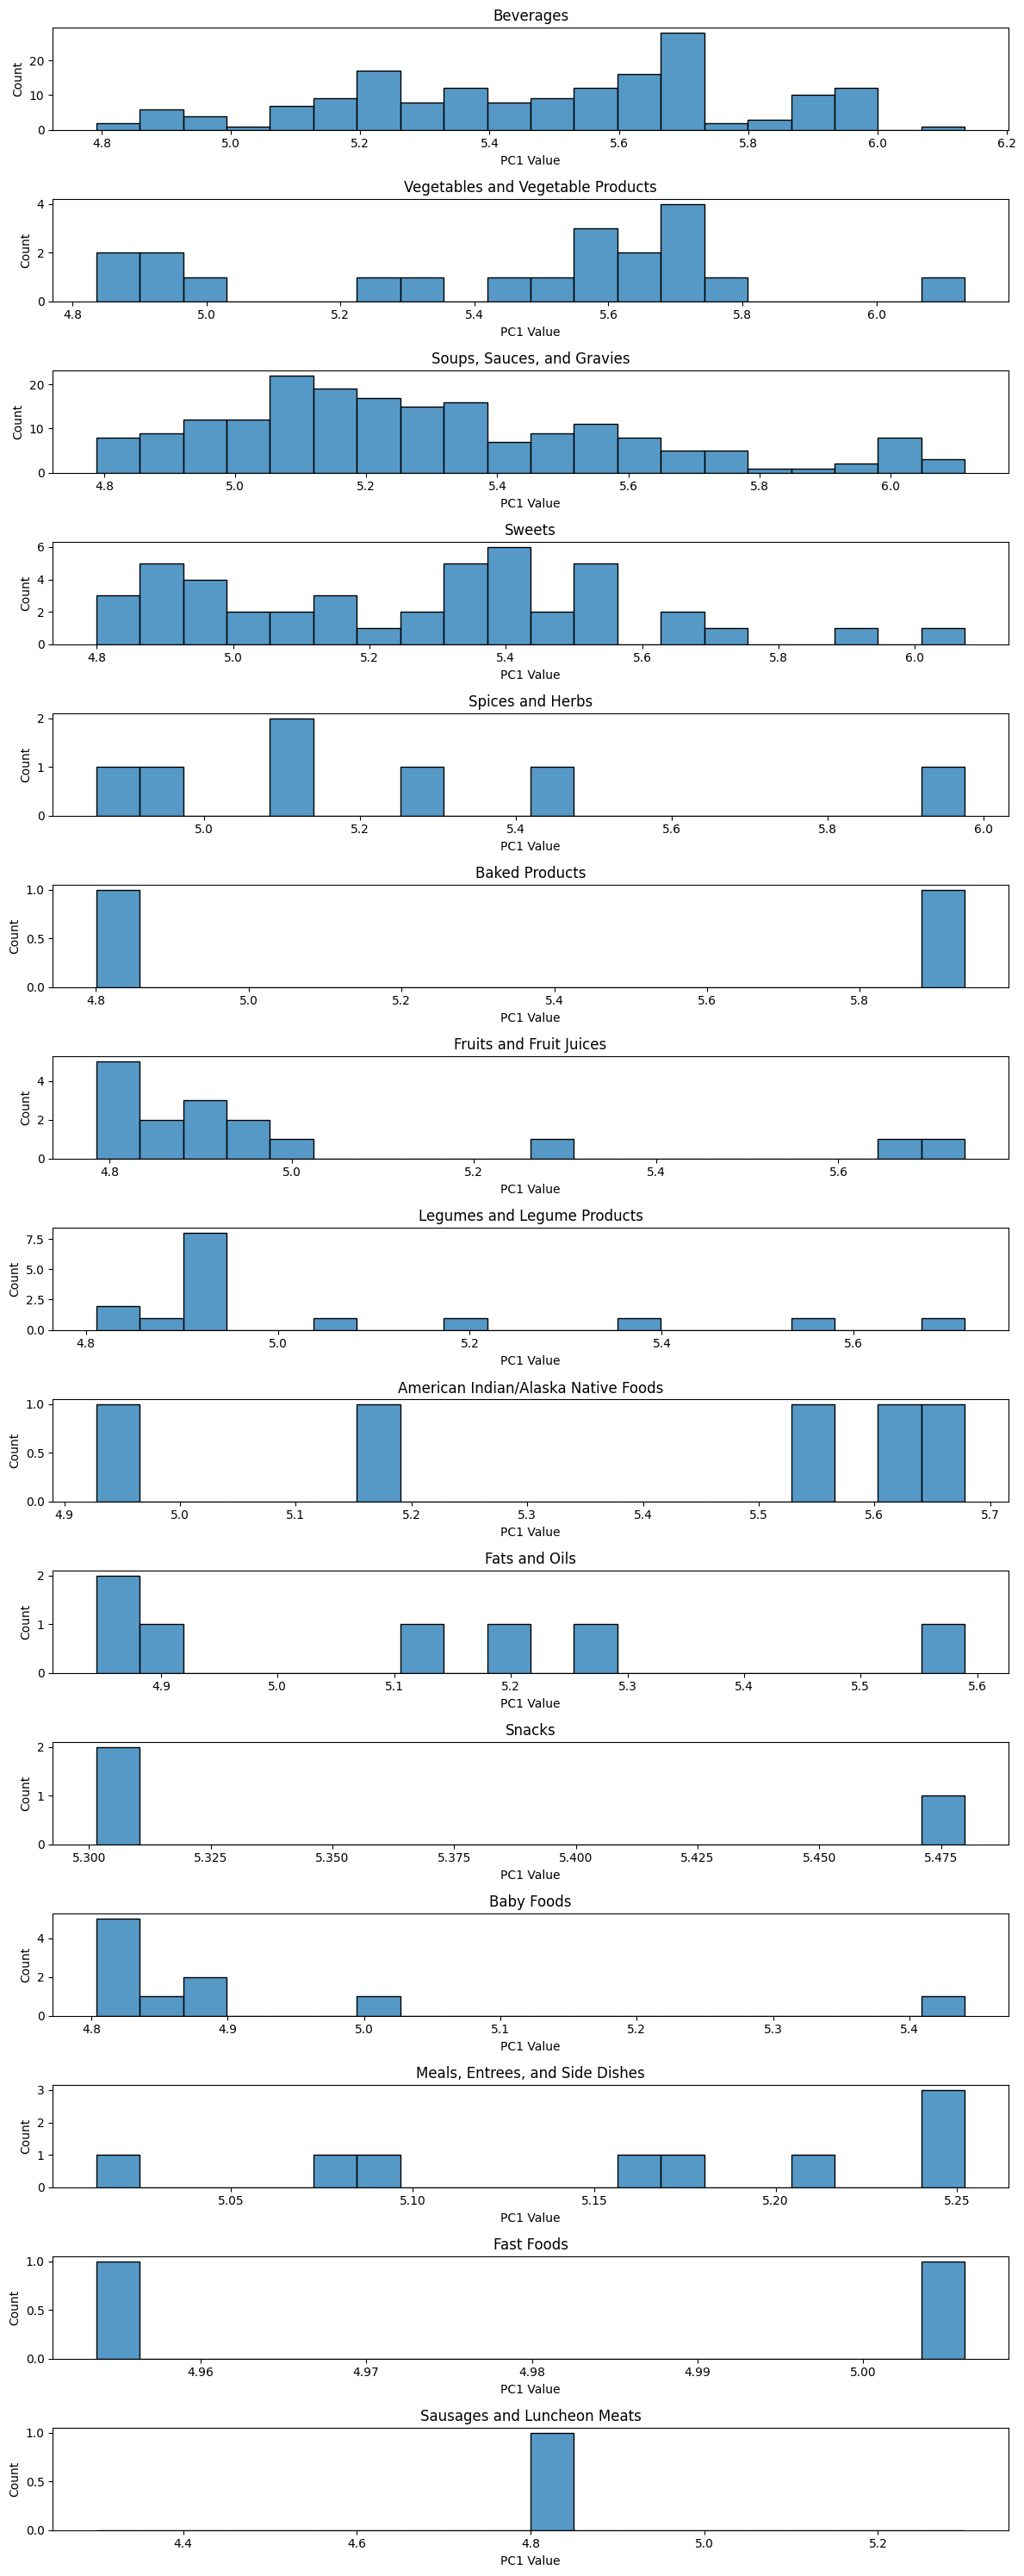

In [26]:
#TODO
food_groups = top_500_pc1['FoodGroup'].unique()
plt.figure(figsize=(12, len(food_groups) * 2))
for i, group in enumerate(food_groups):
    plt.subplot(len(food_groups), 1, i + 1)
    sns.histplot(top_500_pc1[top_500_pc1['FoodGroup'] == group]['PC1'], kde=False, bins=20)
    plt.title(group)
    plt.xlabel('PC1 Value')
    plt.ylabel('Count')
    plt.tight_layout()

plt.show()

Do the same for pca2.

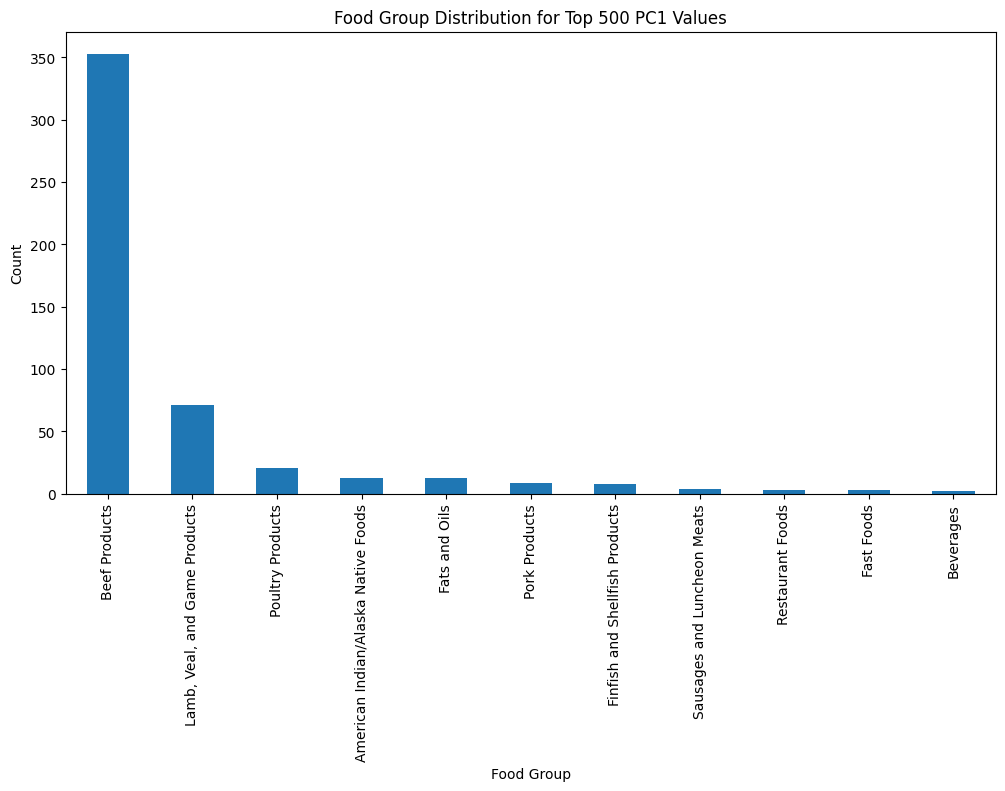

In [27]:
#TODO
top_500_pc2 = pca_df.nlargest(500, 'PC2')
plt.figure(figsize=(12, 6))
top_500_pc2['FoodGroup'].value_counts().plot(kind='bar')
plt.xlabel('Food Group')
plt.ylabel('Count')
plt.title('Food Group Distribution for Top 500 PC1 Values')
plt.show()

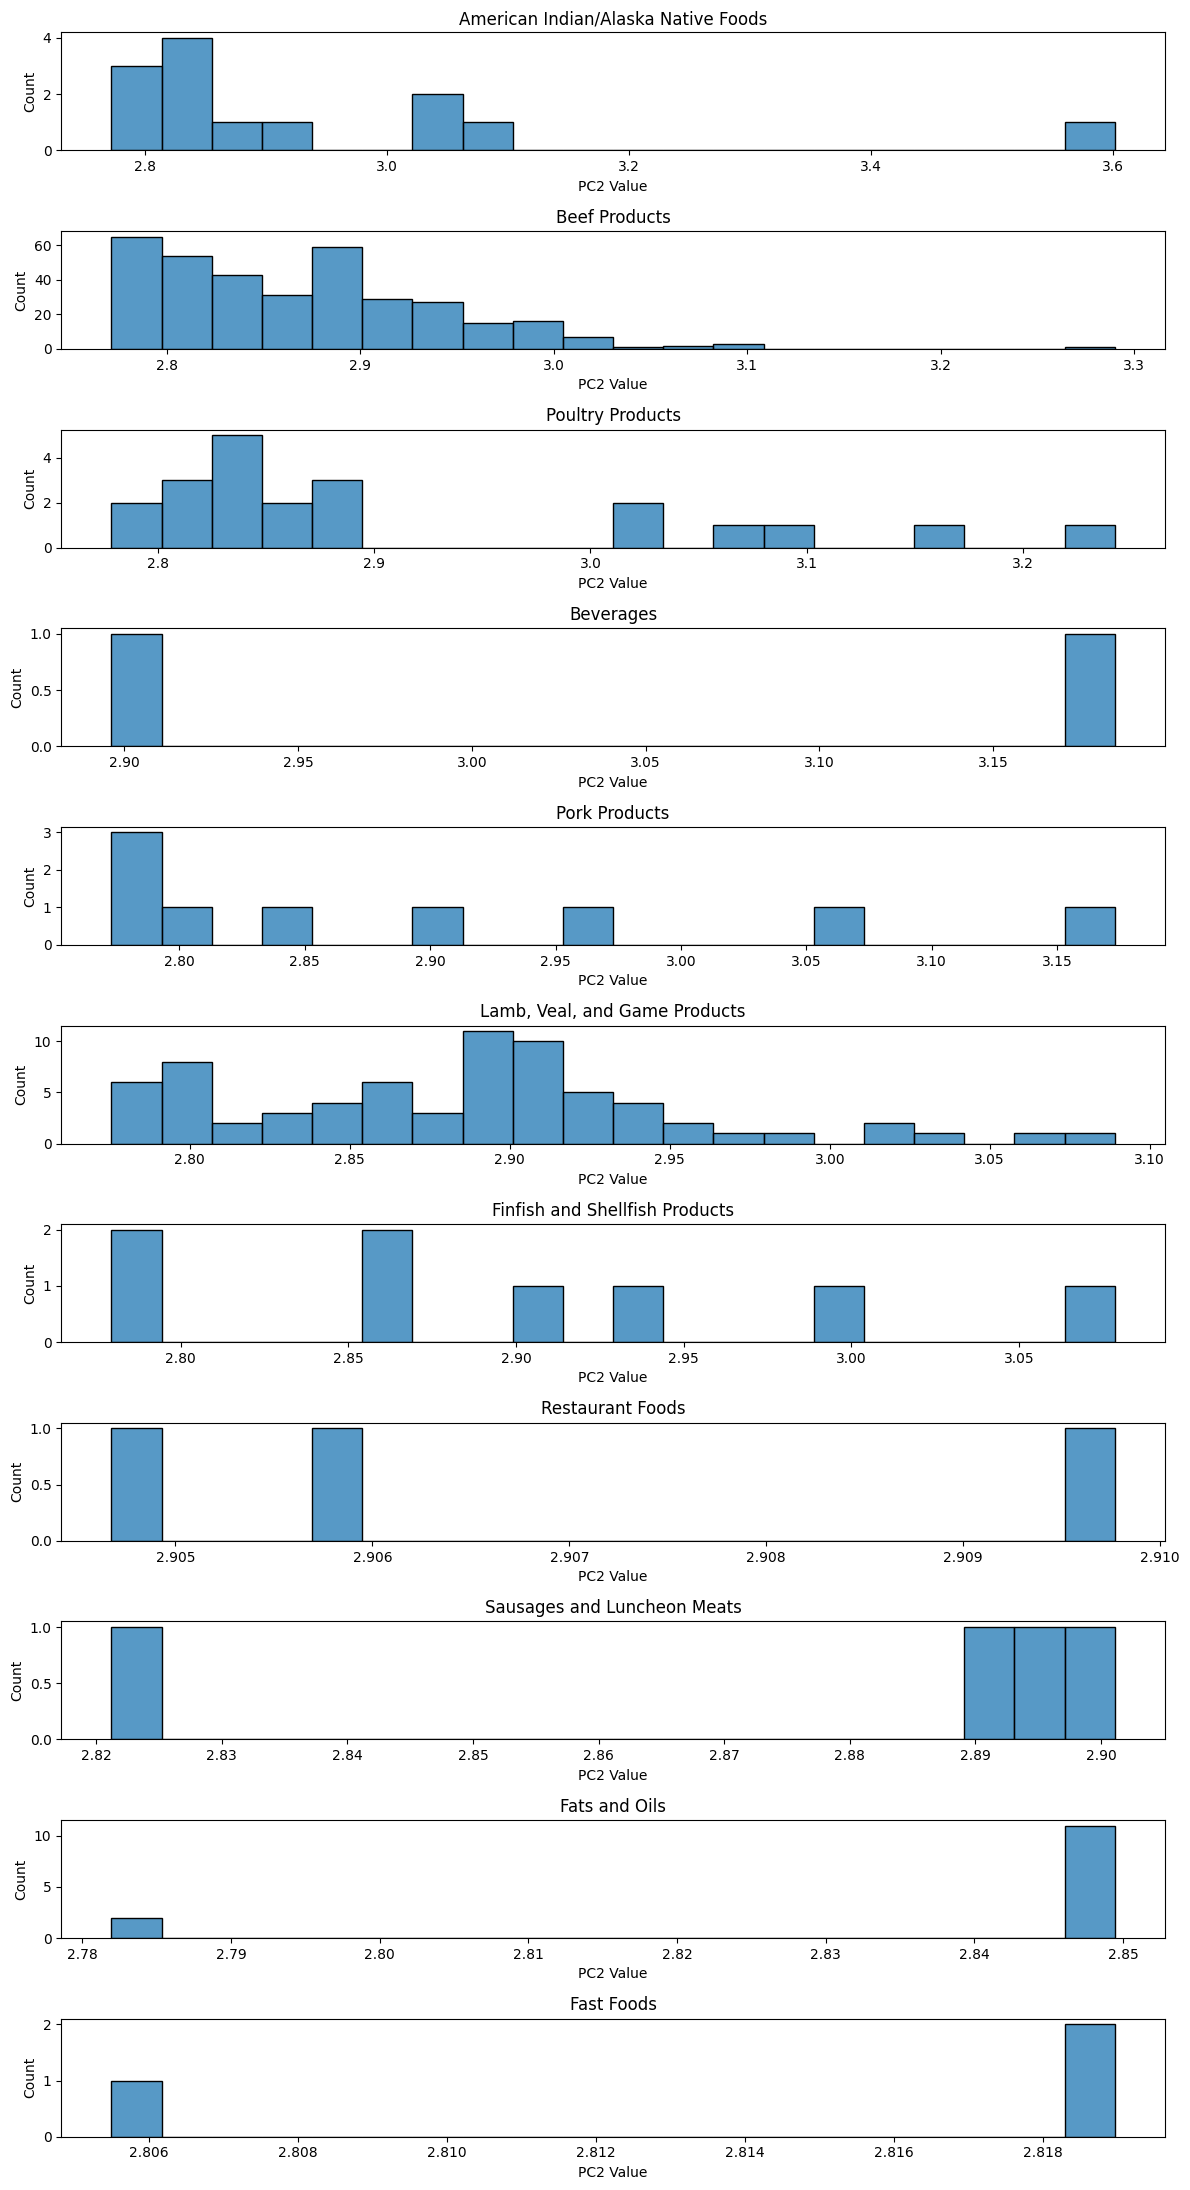

In [28]:
#TODO
food_groups = top_500_pc2['FoodGroup'].unique()
plt.figure(figsize=(12, len(food_groups) * 2))
for i, group in enumerate(food_groups):
    plt.subplot(len(food_groups), 1, i + 1)
    sns.histplot(top_500_pc2[top_500_pc2['FoodGroup'] == group]['PC2'], kde=False, bins=20)
    plt.title(group)
    plt.xlabel('PC2 Value')
    plt.ylabel('Count')
    plt.tight_layout()

plt.show()

### 3- Final result (5)

Lastly, plot the pca1 and pca2 for ```Beverages``` and ```Breakfast Cereals``` in ```FoodGroup```.


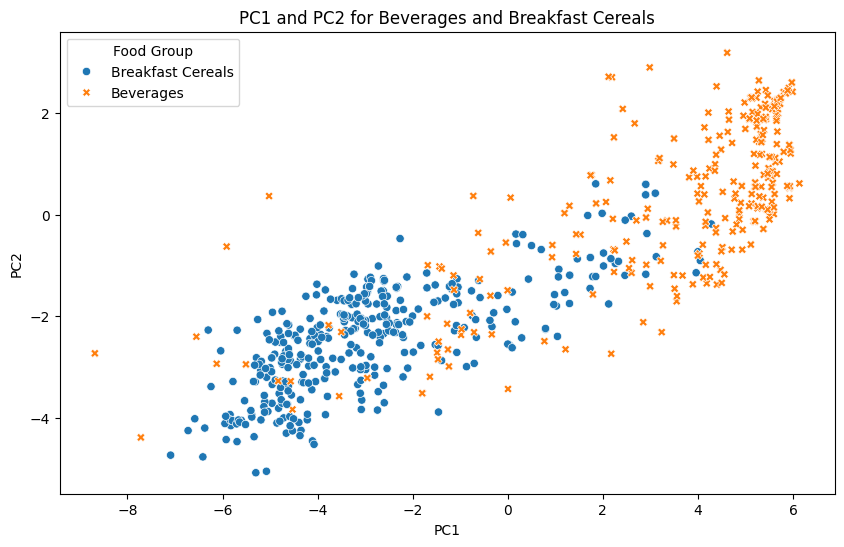

In [29]:
#TODO
beverages_breakfast_cereals = pca_df[pca_df['FoodGroup'].isin(['Beverages', 'Breakfast Cereals'])]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=beverages_breakfast_cereals, x='PC1', y='PC2', hue='FoodGroup', style='FoodGroup')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PC1 and PC2 for Beverages and Breakfast Cereals')
plt.legend(title='Food Group')
plt.show()

### What can we learn from the plots in the last subsection (distributions)? (2.5)

<span style="color:skyblue;font-size: 20px;">Your Answer</span>
جداسازی گروه های غذایی:

نمودار پراکندگی نشان می دهد که "نوشیدنی ها" و "غلات صبحانه" خوشه های مجزایی در فضای PCA دارند.
"نوشیدنی ها" در مقایسه با "غلات صبحانه" ارزش PCA1 بالاتری دارند. این نشان می‌دهد که اجزای اصلی که به واریانس «نوشیدنی‌ها» کمک می‌کنند با مؤلفه‌های «غلات صبحانه» متفاوت است.

با این حال در اینجا برخی از همپوشانی بین دو گروه غذایی وجود دارد که نشان می دهد برخی از شباهت ها در ترکیبات مغذی آنها وجود دارد.

### How do the last plot and the distribution of PCA1 in each food group relate to each other? (2.5)

<span style="color:skyblue;font-size: 20px;">Your answer</span>
گسترش مقادیر PCA1 در هر گروه غذایی (که در نمودارهای جعبه دیده می شود) نشان دهنده تنوع در ترکیب مواد مغذی در آن گروه است.
نمودار پراکندگی با نشان دادن اینکه چگونه نقاط درون هر گروه در اطراف مقادیر PCA1 و PCA2 مربوطه خود خوشه می شوند، این را بیشتر تجسم می کند.
به عنوان مثال، یک جعبه پهن برای "غلات صبحانه" با یک خوشه پراکنده تر در نمودار پراکنده همبستگی دارد، که نشان دهنده تنوع بیشتر در آن گروه است.
